# Prediction using Decision Tree Algorithm
## - Motivation:
For the given `'Iris' dataset`, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import plot_tree

# Import necessary libraries for graph viz 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [45]:
# Read in the dataset:
data = pd.read_csv('dataset/Iris.csv')

# Print that data imported successfully
print("Data imported successfully \n")

# See the first 5 rows:
print("Let's see a part of the whole dataset - \n")
data.head()

Data imported successfully 

Let's see a part of the whole dataset - 



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
# Check the info of the 'Iris' dataset:
print ("The info about the datset is as follows - \n")
data.info()

The info about the datset is as follows - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [47]:
target = data['Species']
df = data.copy()
df = df.drop('Species', axis =1)
df.shape

(150, 5)

## - Data Cleaning
As we can see there are `no null values` present. We can use the dataset as it is. There is no need of the Data Cleaning
Let's plot a pair plot to visualise all the attributes's dependency on each other in one go.

## - Data Visualization

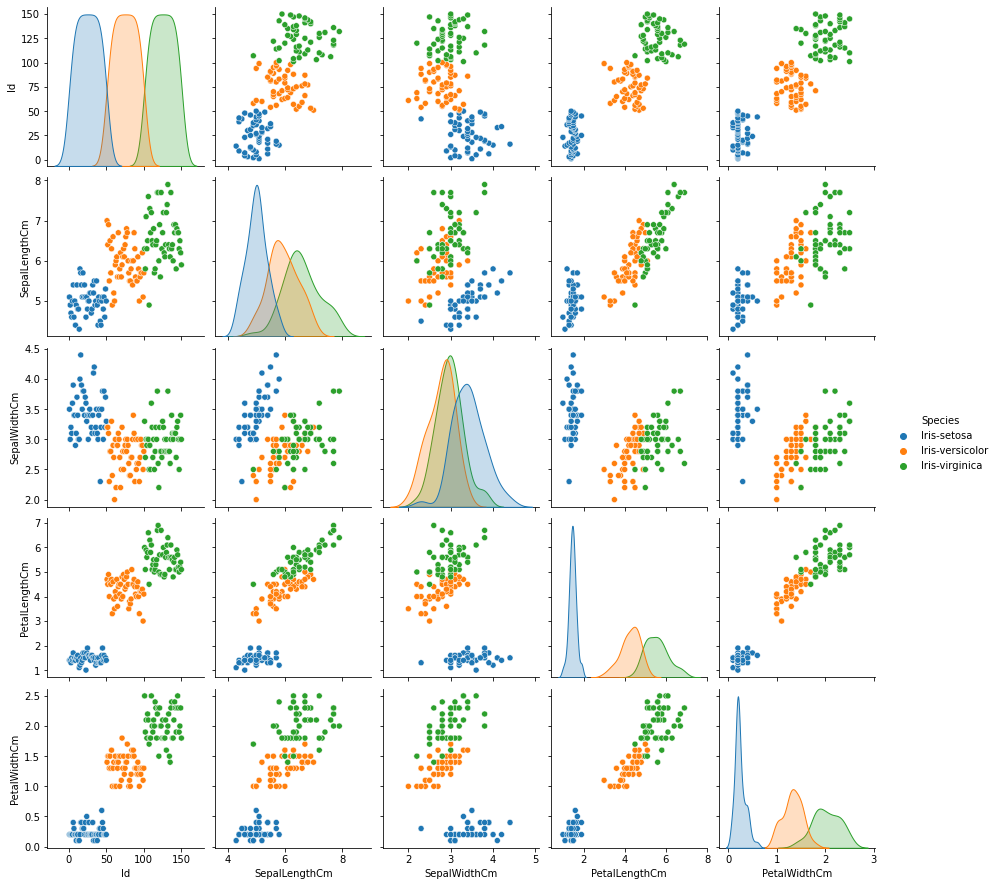

In [48]:
# Plotting the pair plot
sns.pairplot(data, hue = 'Species')

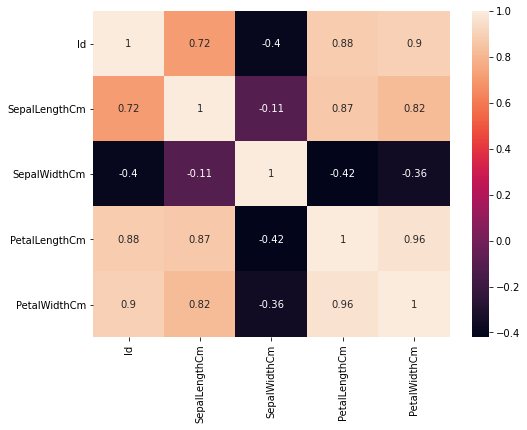

In [49]:
# To find the corelation between Species
relation = data.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(relation, annot=True) 
plt.show()

### Observations made from the graph -

- Petal length is highly related to petal width.
- Sepal lenth is not related sepal width.

### - Preparing the data:
**Defining 'X'**

In [50]:
# Defining the attributes and labels

X = data.iloc[:, [0, 1, 2, 3]].values #Attributes

le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

y = data['Species'].values  #Labels

print("The shape of the data is-", data.shape)

The shape of the data is- (150, 6)


### - Implementation of Decision Tree Algorithm

In [51]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42 )

print("Training split - ", X_train.shape)
print("Testing split - ", X_test.shape)

Training split -  (120, 4)
Testing split -  (30, 4)


In [52]:

# Defining the decision tree algorithm

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [53]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

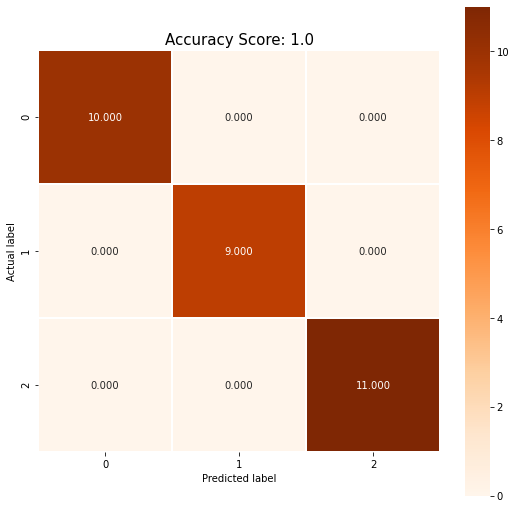

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

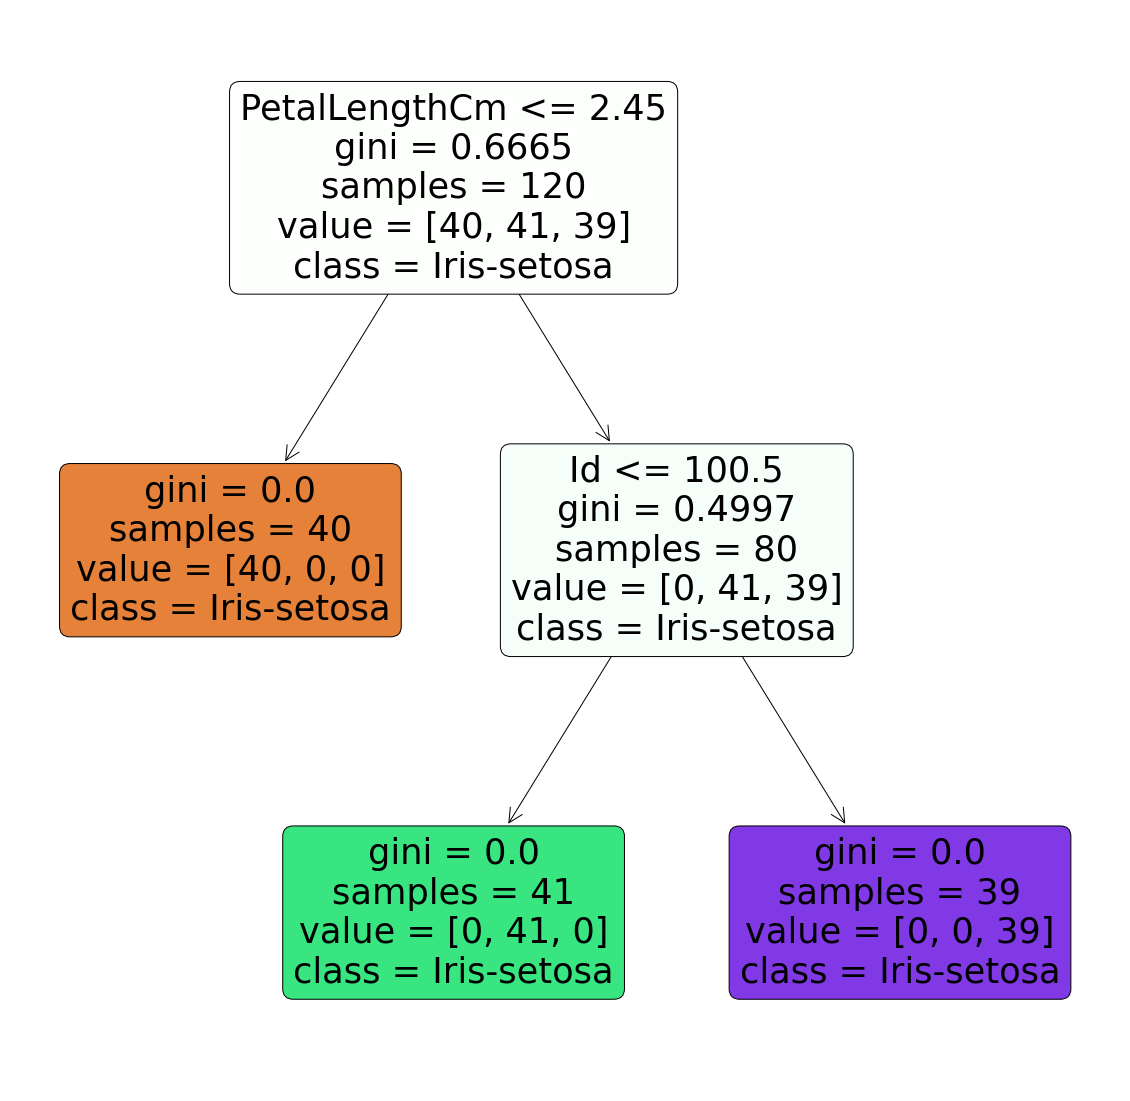

In [55]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (20,20))
dec_tree = plot_tree(dtree, feature_names = df.columns, 
                     class_names = target.values, filled = True , precision = 4, rounded = True);


# Thank You
### *Love to get any type of  feedback or suggestions*